In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
!wget https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx

--2021-09-01 07:42:12--  https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx
Resolving dshs.texas.gov (dshs.texas.gov)... 52.26.98.234
Connecting to dshs.texas.gov (dshs.texas.gov)|52.26.98.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605615 (591K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘CombinedHospitalDataoverTimebyTSA.xlsx.4’

CombinedHospitalDat 100%[===================>] 591.42K  1.37MB/s    in 0.4s    

2021-09-01 07:42:16 (1.37 MB/s) - ‘CombinedHospitalDataoverTimebyTSA.xlsx.4’ saved [605615/605615]



In [3]:
!pip3 install openpyxl

In [4]:
df_Texas_Covid_Hospital_Percentage = pd.read_excel("./CombinedHospitalDataoverTimebyTSA.xlsx",header=2,  sheet_name=r'COVID Hospitalizations (%)', engine='openpyxl')

In [10]:
a = df_Texas_Covid_Hospital_Percentage.set_index('TSA AREA')

In [11]:
a

,TSA ID,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,...,2021-08-20,2021-08-21,2021-08-22,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29
TSA AREA,,,,,,,,,,,,,,,,,,,,,
Amarillo,A.,4.08%,3.98%,3.69%,12.42%,3.45%,4.34%,3.30%,6.54%,5.94%,...,25.19%,24.81%,26.27%,27.49%,24.77%,22.95%,23.54%,22.70%,23.03%,23.12%
Lubbock,B.,4.50%,4.70%,4.22%,4.55%,4.03%,4.62%,4.48%,3.97%,4.35%,...,22.83%,23.57%,24.47%,23.38%,23.23%,26.21%,26.11%,22.53%,23.85%,23.18%
Wichita Falls,C.,2.08%,2.24%,2.60%,2.15%,2.63%,0.00%,0.00%,0.00%,3.28%,...,10.05%,11.28%,11.58%,10.92%,11.07%,11.89%,11.86%,12.81%,12.88%,12.26%
Abilene,D.,2.80%,4.79%,0.75%,2.21%,1.82%,3.10%,1.25%,4.63%,3.37%,...,19.93%,22.73%,22.49%,22.81%,22.91%,23.95%,24.06%,26.13%,27.12%,27.10%
Dallas/Ft. Worth,E.,5.02%,4.44%,4.34%,5.10%,5.21%,5.22%,4.78%,5.20%,5.18%,...,21.68%,22.24%,23.07%,23.43%,23.31%,22.41%,22.10%,22.75%,23.08%,24.31%
Paris,F.,3.33%,3.95%,5.05%,3.82%,3.12%,2.49%,2.55%,3.64%,3.42%,...,32.42%,30.42%,32.23%,33.17%,30.52%,29.65%,31.28%,30.23%,28.71%,29.38%
Longview/Tyler,G.,3.47%,2.79%,3.41%,3.13%,3.46%,4.32%,3.37%,4.15%,4.69%,...,31.00%,31.71%,31.87%,34.47%,35.85%,34.90%,34.88%,35.01%,35.98%,36.13%
Lufkin,H.,7.89%,9.09%,15.44%,9.74%,11.34%,12.97%,16.37%,13.17%,10.96%,...,36.41%,44.22%,47.76%,41.76%,56.34%,52.37%,42.39%,42.75%,47.71%,46.91%
El Paso,I.,4.27%,4.88%,3.77%,4.19%,3.97%,4.43%,3.32%,3.74%,4.97%,...,7.27%,8.02%,8.48%,8.62%,8.43%,8.18%,8.23%,8.32%,8.10%,8.00%


In [12]:
a.T['San Antonio'][1:100]

2020-04-11     1.68%
2020-04-12     1.67%
2020-04-13     1.95%
2020-04-14     1.94%
2020-04-15     1.07%
               ...  
2020-07-14    33.59%
2020-07-15    32.90%
2020-07-16    32.19%
2020-07-17    32.77%
2020-07-18    31.58%
Name: San Antonio, Length: 99, dtype: object

In [13]:
a.T['San Antonio'][1:].index[0][8:10]

'11'

In [23]:
dated_dict = {}
count = 0
for x in a.T['San Antonio'][1:].index[1:100]:
    print(x)
    if x == '44051':
        day_temp = int(8)
        month_temp = int(8)
        year_temp = int(2020)
    else:
        day_temp = int(x[8:10])
        month_temp = int(x[5:7])
        year_temp = int(x[0:4])
    print(year_temp, month_temp, day_temp)
    dated_dict[datetime.datetime(year_temp, month_temp, day_temp)] = a.T['San Antonio'][count + 1][:-1].split('.')[0]
    count += 1  
 

2020-04-12
2020 4 12
2020-04-13
2020 4 13
2020-04-14
2020 4 14
2020-04-15
2020 4 15
2020-04-16
2020 4 16
2020-04-17
2020 4 17
2020-04-18
2020 4 18
2020-04-19
2020 4 19
2020-04-20
2020 4 20
2020-04-21
2020 4 21
2020-04-22
2020 4 22
2020-04-23
2020 4 23
2020-04-24
2020 4 24
2020-04-25
2020 4 25
2020-04-26
2020 4 26
2020-04-27
2020 4 27
2020-04-28
2020 4 28
2020-04-29
2020 4 29
2020-04-30
2020 4 30
2020-05-01
2020 5 1
2020-05-02
2020 5 2
2020-05-03
2020 5 3
2020-05-04
2020 5 4
2020-05-05
2020 5 5
2020-05-06
2020 5 6
2020-05-07
2020 5 7
2020-05-08
2020 5 8
2020-05-09
2020 5 9
2020-05-10
2020 5 10
2020-05-11
2020 5 11
2020-05-12
2020 5 12
2020-05-13
2020 5 13
2020-05-14
2020 5 14
2020-05-15
2020 5 15
2020-05-16
2020 5 16
2020-05-17
2020 5 17
2020-05-18
2020 5 18
2020-05-19
2020 5 19
2020-05-20
2020 5 20
2020-05-21
2020 5 21
2020-05-22
2020 5 22
2020-05-23
2020 5 23
2020-05-24
2020 5 24
2020-05-25
2020 5 25
2020-05-26
2020 5 26
2020-05-27
2020 5 27
2020-05-28
2020 5 28
2020-05-29
2020 5 29
2

In [24]:
dated_dict

{datetime.datetime(2020, 4, 12, 0, 0): '1',
 datetime.datetime(2020, 4, 13, 0, 0): '1',
 datetime.datetime(2020, 4, 14, 0, 0): '1',
 datetime.datetime(2020, 4, 15, 0, 0): '1',
 datetime.datetime(2020, 4, 16, 0, 0): '1',
 datetime.datetime(2020, 4, 17, 0, 0): '1',
 datetime.datetime(2020, 4, 18, 0, 0): '1',
 datetime.datetime(2020, 4, 19, 0, 0): '1',
 datetime.datetime(2020, 4, 20, 0, 0): '1',
 datetime.datetime(2020, 4, 21, 0, 0): '1',
 datetime.datetime(2020, 4, 22, 0, 0): '2',
 datetime.datetime(2020, 4, 23, 0, 0): '2',
 datetime.datetime(2020, 4, 24, 0, 0): '1',
 datetime.datetime(2020, 4, 25, 0, 0): '1',
 datetime.datetime(2020, 4, 26, 0, 0): '1',
 datetime.datetime(2020, 4, 27, 0, 0): '1',
 datetime.datetime(2020, 4, 28, 0, 0): '1',
 datetime.datetime(2020, 4, 29, 0, 0): '1',
 datetime.datetime(2020, 4, 30, 0, 0): '1',
 datetime.datetime(2020, 5, 1, 0, 0): '1',
 datetime.datetime(2020, 5, 2, 0, 0): '1',
 datetime.datetime(2020, 5, 3, 0, 0): '1',
 datetime.datetime(2020, 5, 4, 0, 0

In [25]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Hospitalized Percentage With COVID'])

In [26]:
dated_df

,Date,Hospitalized Percentage With COVID
0,2020-04-12,1
1,2020-04-13,1
2,2020-04-14,1
3,2020-04-15,1
4,2020-04-16,1
...,...,...
94,2020-07-15,33
95,2020-07-16,32
96,2020-07-17,32
97,2020-07-18,32


In [27]:
c = dated_df.set_index('Date')

In [28]:
c

,Hospitalized Percentage With COVID
Date,
2020-04-12,1
2020-04-13,1
2020-04-14,1
2020-04-15,1
2020-04-16,1
...,...
2020-07-15,33
2020-07-16,32
2020-07-17,32


TypeError: unhashable type: 'numpy.ndarray'

Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3654 ticks ([730120.0, ..., 733773.0]), which exceeds Locator.MAXTICKS (1000).
Locator at

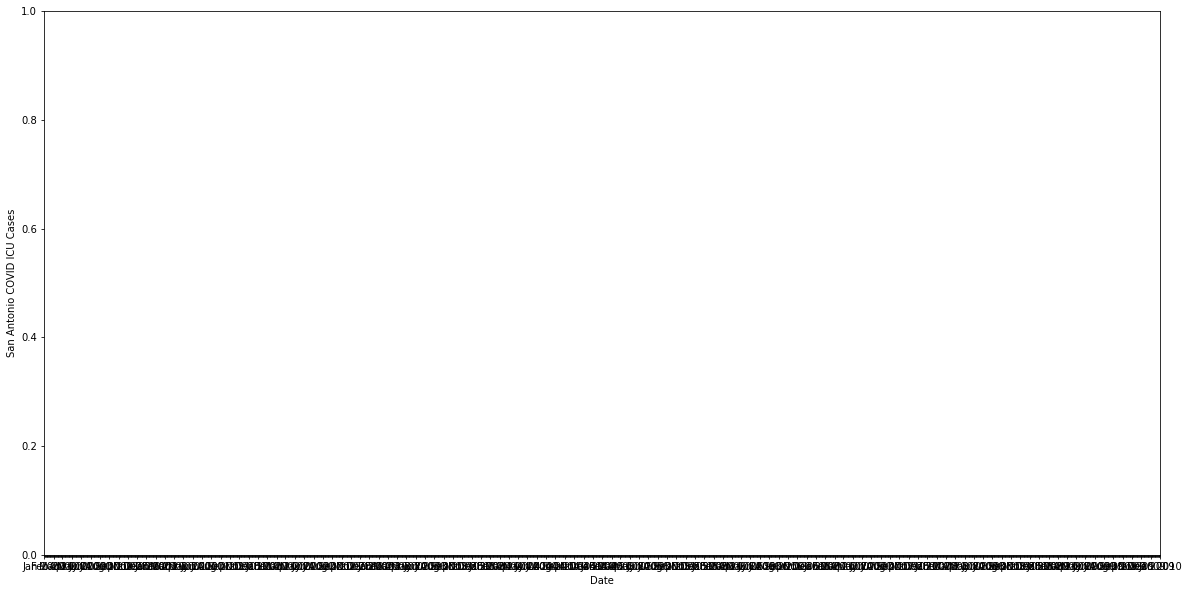

In [29]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('San Antonio COVID ICU Cases',color='black')
plt.plot(c)
plt.legend(['San Antonio Region COVID19 ICU Cases'], loc='upper left')
plt.title('San Antonio Region COVID19 ICU Cases According To DSHS Texas')
plt.savefig('SanAntonioICU.png')